**THE SPARKS FOUNDATION**

**NAME:** **POOJA SHARMA**

**TASK 2:** **EXPLORATORY DATA ANALYSIS-RETAIL**

**DATASET:** **SAMPLESUPERSTORE**

**PROBLEM STATEMENT:** **AS A BUSINESS MANAGER, TRY TO FIND OUT THE WEAK AREAS WHERE YOU CAN WORK TO MAKE MORE PROFIT AND WHAT ALL BUSINESS PROBLEMS YOU CAN DRIVE BY EXPLORING THE DATA**  (dataset link) -(https://bit.ly/3i4rbWl)

**DOMAIN:** **DATA SCIENCE & BUSINESS ANALYTICS INTERNSHIP**


###IMPORTING THE LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

###LOADING THE DATASET

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving SampleSuperstore.csv to SampleSuperstore.csv


In [ ]:
dataset = pd.read_csv("SampleSuperstore.csv")
df=pd.DataFrame(dataset)
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


###UNDERSTANDING THE DATASET

In [ ]:
df.shape

(9994, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [ ]:
#Columns in the dataset
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [ ]:
#Category types in the dataset
df["Category"].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [ ]:
#types of Sub-Category in the dataset
df["Sub-Category"].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [ ]:
#types of segments in the dataset
df["Segment"].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

###EVALUATING THE MISSING VALUES IN THE DATASET

In [ ]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

since we can see that "Country" is same for the dataset and we dont really need the "Postal Code" for this Analysis so we will drop both the columns using the drop command

In [ ]:
df.drop(["Country", "Postal Code"], axis=1, inplace=True)
df

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,Miami,Florida,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,Costa Mesa,California,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,Costa Mesa,California,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,Costa Mesa,California,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [ ]:
df.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


since from above we can observe that

**Min Sales:** **0.444**, **Max Sales:** **22638.48**, **Max Profit:** **8399.976**

In [ ]:
#Total Sales:
print("Total Sales are: {}".format(df["Sales"].sum()))

#Total Profit:
print("Total Profit are: {}".format(df["Profit"].sum()))

Total Sales are: 2297200.8603000003
Total Profit are: 286397.0217


###CHECKING FOR DUPLICATE VALUES

In [ ]:
df.duplicated().sum()

50

###REMOVING DUPLICATE VALUES

In [ ]:
df.drop_duplicates(inplace=True)
df

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,Miami,Florida,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,Costa Mesa,California,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,Costa Mesa,California,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,Costa Mesa,California,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [ ]:
#checking once again
df.duplicated().sum()

0

after cleaning the data we will analyzed our cleaned data using PAIR PLOT for all the numeric values in the Dataset

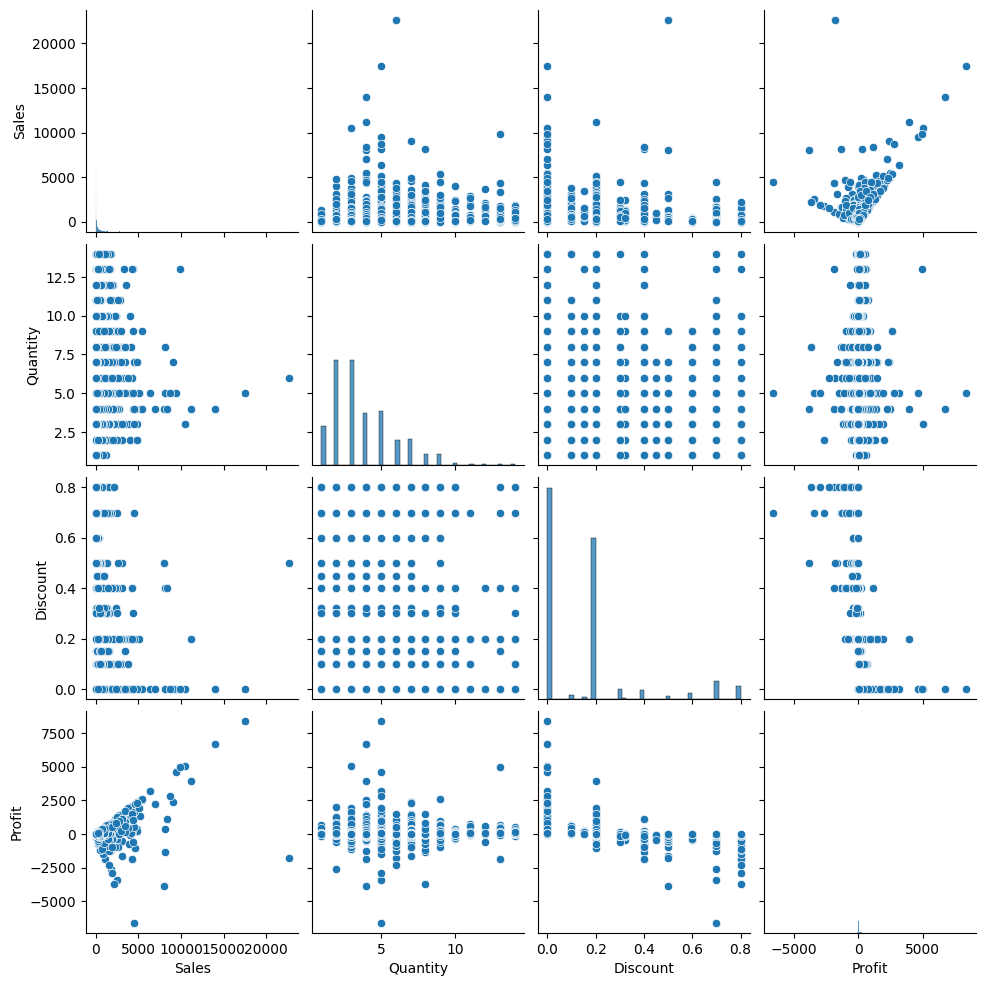

In [ ]:
sns.pairplot(df)

observations:
1. As Discount increases Profit decreases
2. As discount increases Sales decreases
3. As Sales increases Profit increases

# **Correlation Among The Cloumns**

In [ ]:
df.corr()

<ipython-input-19-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200469,-0.028625,0.479078
Quantity,0.200469,1.000000,0.008307,0.066089
Discount,-0.028625,0.008307,1.000000,-0.219939
Profit,0.479078,0.066089,-0.219939,1.000000


<ipython-input-20-6b61ba7ab58f>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


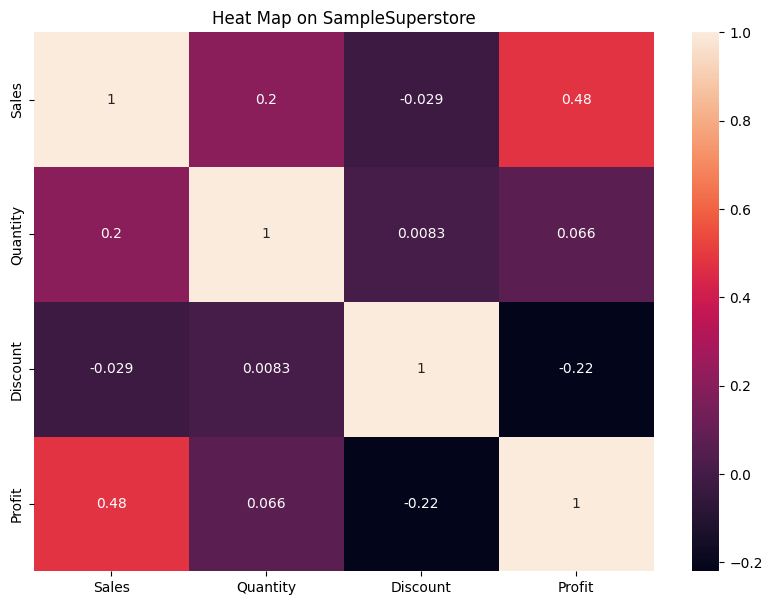

In [ ]:
#Visualization using HEATMAP
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True)
plt.title("Heat Map on SampleSuperstore")
plt.show()

obervations:
1. Most correlation lies in Sales and Profit
2. Least correlations lies in Discount and Quantity

**PAIR PLOT FOR SHIP MODE**

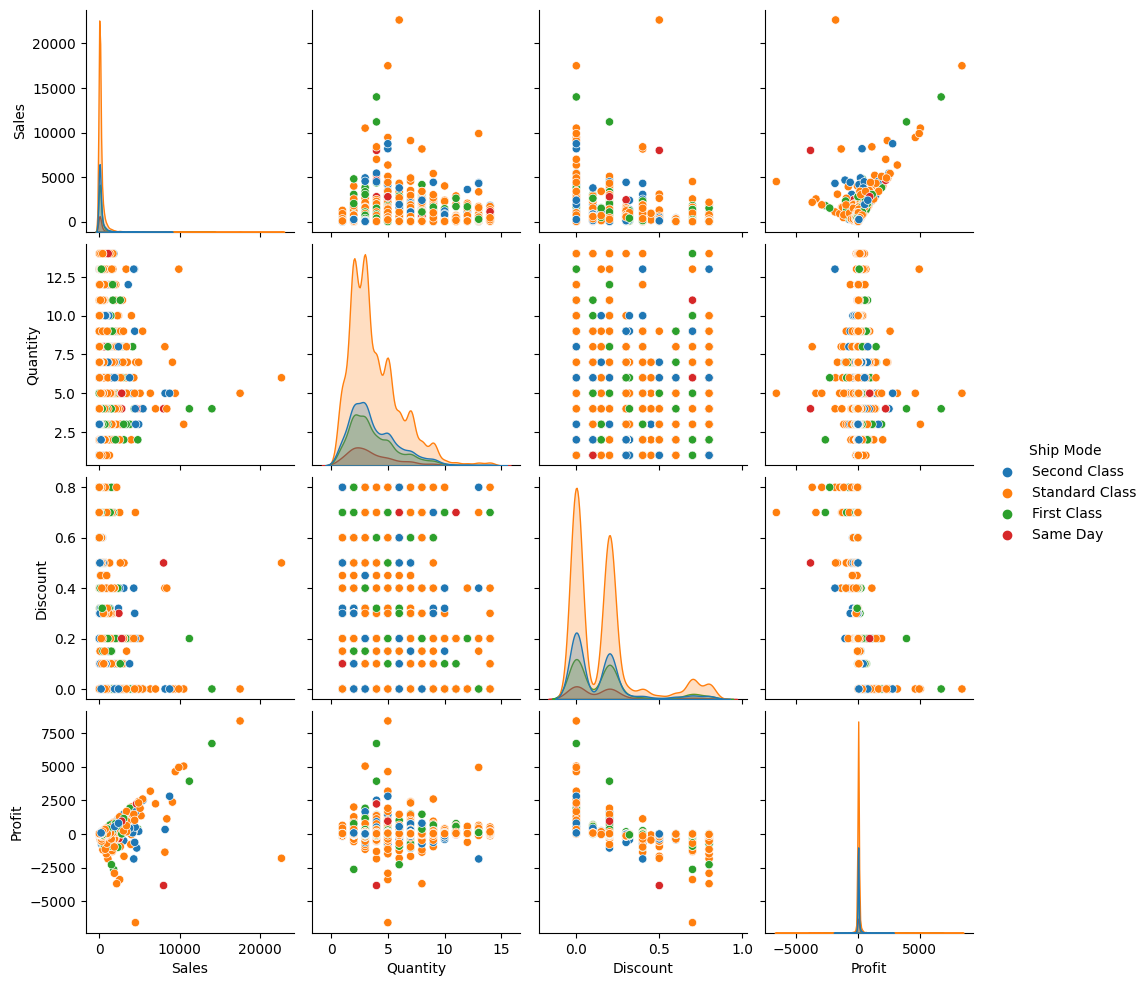

In [ ]:
sns.pairplot(df, hue="Ship Mode")

In [ ]:
df["Ship Mode"].value_counts()

Standard Class    5930
Second Class      1941
First Class       1531
Same Day           542
Name: Ship Mode, dtype: int64

<Axes: xlabel='Ship Mode', ylabel='count'>

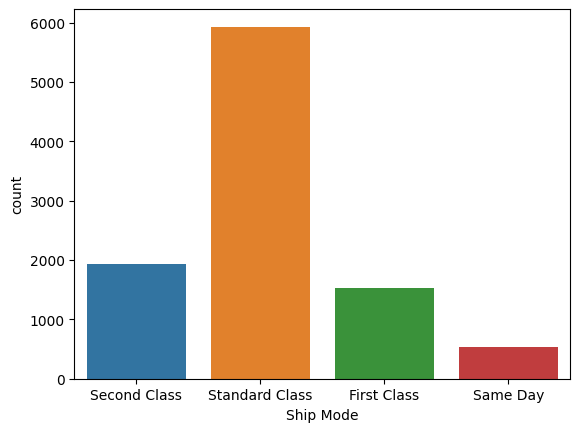

In [ ]:
sns.countplot(x=df["Ship Mode"])

observations:
1. Most opted Ship Mode: Standard Class
2. Least opted Ship Mode: Same Day

**Plotting the BAR GRAPH for Profit v/s Sales for the following:**

In [ ]:
new_df=df.groupby("Ship Mode")[["Profit", "Sales"]].sum()

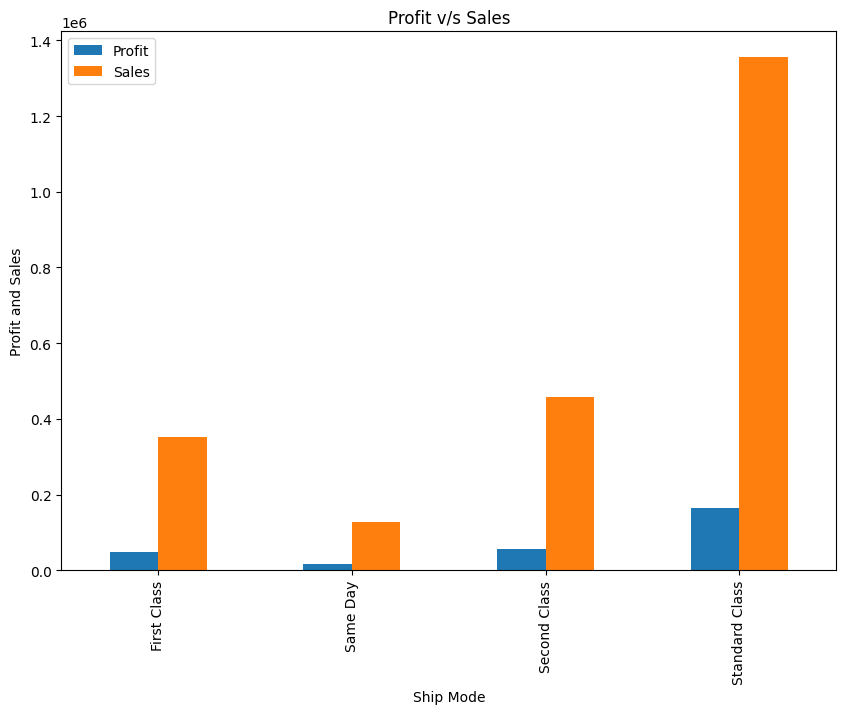

In [ ]:
new_df.plot(kind="bar", figsize=(10,7))
plt.title("Profit v/s Sales")
plt.ylabel("Profit and Sales")

plt.show()

observations:
1. Maximum Profit and Sales: Standard Class
2. Minimum Profit and Sales: Same Day

**Region Wise Ship Mode**

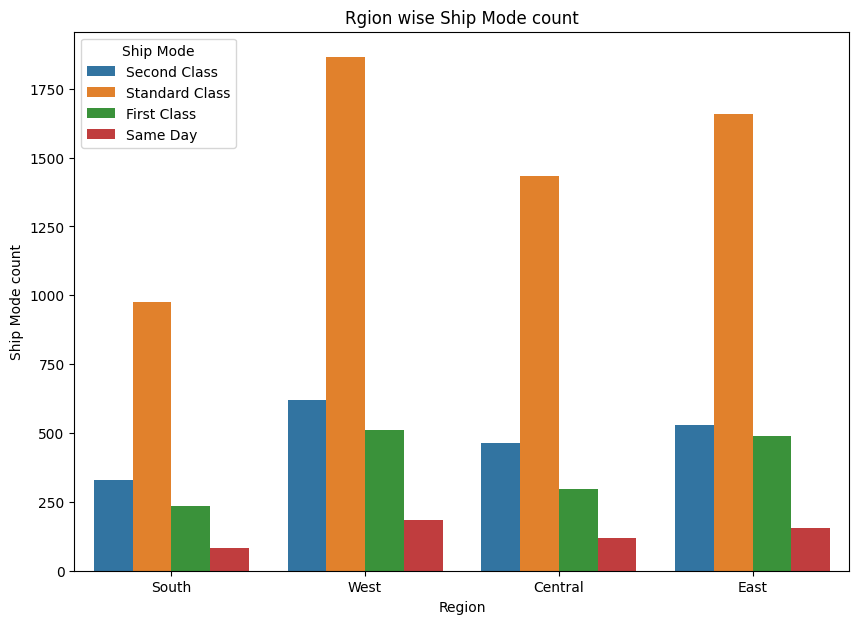

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(x="Region", hue= "Ship Mode", data=df)
plt.title("Rgion wise Ship Mode count")
plt.ylabel("Ship Mode count")
plt.show()

observations:
1. Most opt Ship Mode: Standard Class
2. Least opt Ship Mode: Same Day

**Maximum no. of Business Deals Region-Wise**

In [ ]:
region=df["Region"].value_counts()
region

West       3177
East       2832
Central    2315
South      1620
Name: Region, dtype: int64

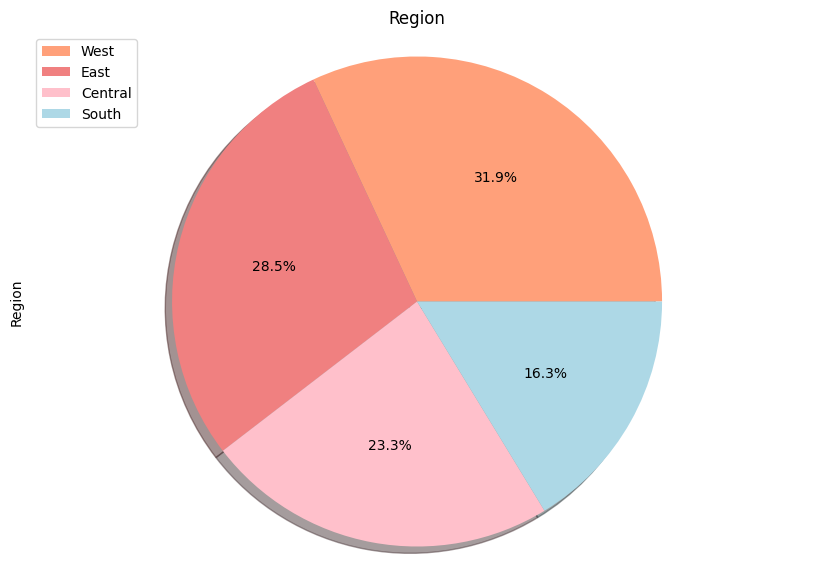

In [ ]:
region.plot(kind="pie", figsize=(10,7), autopct="%1.1f%%", shadow=True, labels=None, colors=["lightsalmon", "Lightcoral", "pink", "lightblue"])
plt.title("Region")
plt.legend(labels=region.index, loc="upper left")
plt.axis("equal")
plt.show()

observations:
company deals majorly with Western Region and least with South Region

**Sales and Profit in different Region**

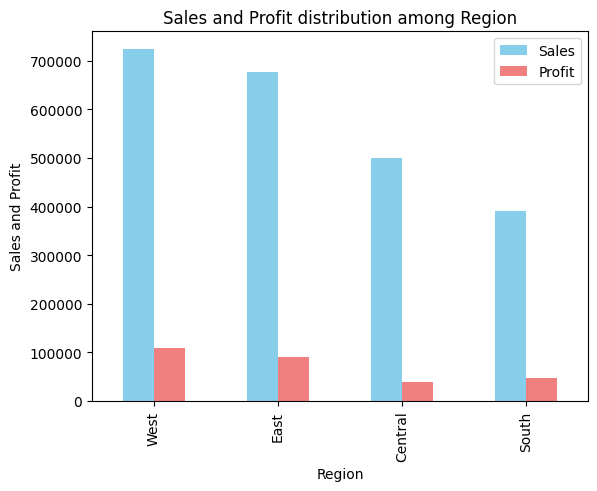

In [ ]:
df.groupby("Region")[["Sales", "Profit"]].sum().sort_values(by=["Sales", "Profit"], ascending=False).plot(kind="bar", color=["skyblue", "lightcoral"])
plt.title("Sales and Profit distribution among Region")
plt.xlabel("Region")
plt.ylabel("Sales and Profit")
plt.show()

observations:
1. Most Sales and Profit is from Western and Eastern Regions
2. Least Sales and Profit is from Central and Southern Region

**Maximum no. of Business Deals Segment-Wise**

In [ ]:
segment=df["Segment"].value_counts()
segment

Consumer       5160
Corporate      3008
Home Office    1776
Name: Segment, dtype: int64

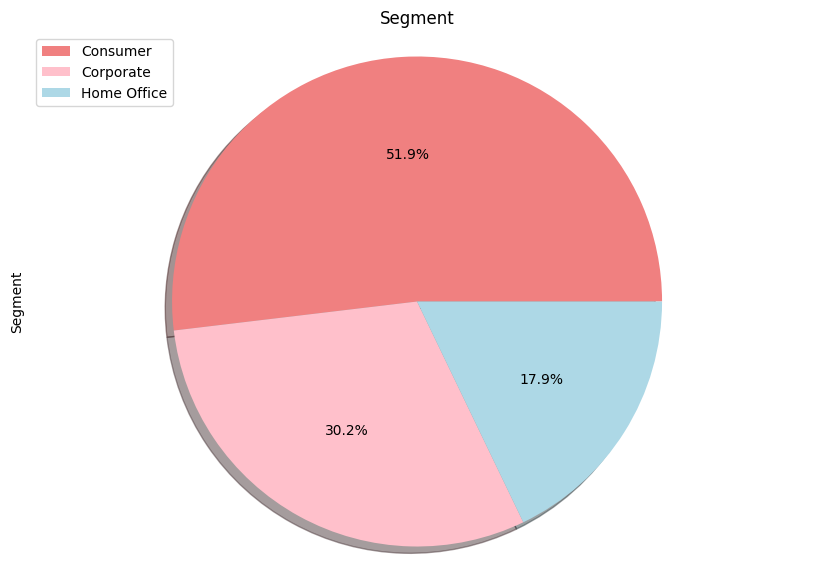

In [ ]:
segment.plot(kind="pie", figsize=(10,7), autopct="%1.1f%%", shadow=True, labels=None, colors=["lightcoral", "pink", "lightblue"])
plt.title("Segment")
plt.legend(labels=segment.index, loc="upper left")
plt.axis("equal")
plt.show()

observations:
Major distribution is in Consumer Segment and Least is in Home Office

**Sales and Profit in different Segments**

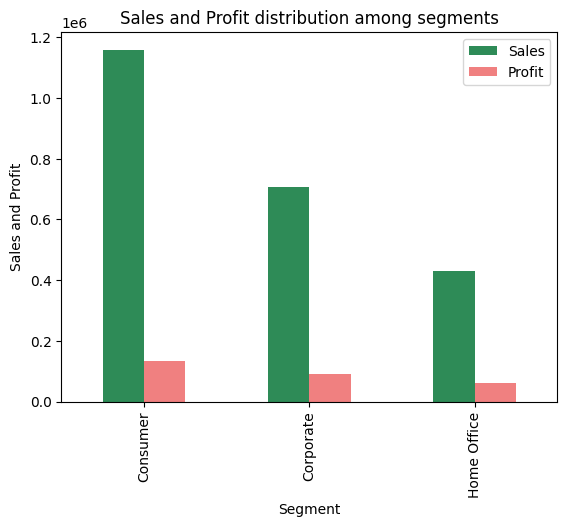

In [ ]:
df.groupby("Segment")[["Sales", "Profit"]].sum().plot(kind="bar", color=["seagreen", "lightcoral"])
plt.title("Sales and Profit distribution among segments")
plt.xlabel("Segment")
plt.ylabel("Sales and Profit")
plt.show()

observations:
Most Sales and Profit is in Consumer Segment and least is in Home Office

TO FIND OUT WHICH CATEGORY CONTRIBUTES MOST TO THE BUSINESS WE WILL BE,


**Plotting the PIE CHART for Category**

In [ ]:
category=df["Category"].value_counts()
category

Office Supplies    5986
Furniture          2114
Technology         1844
Name: Category, dtype: int64

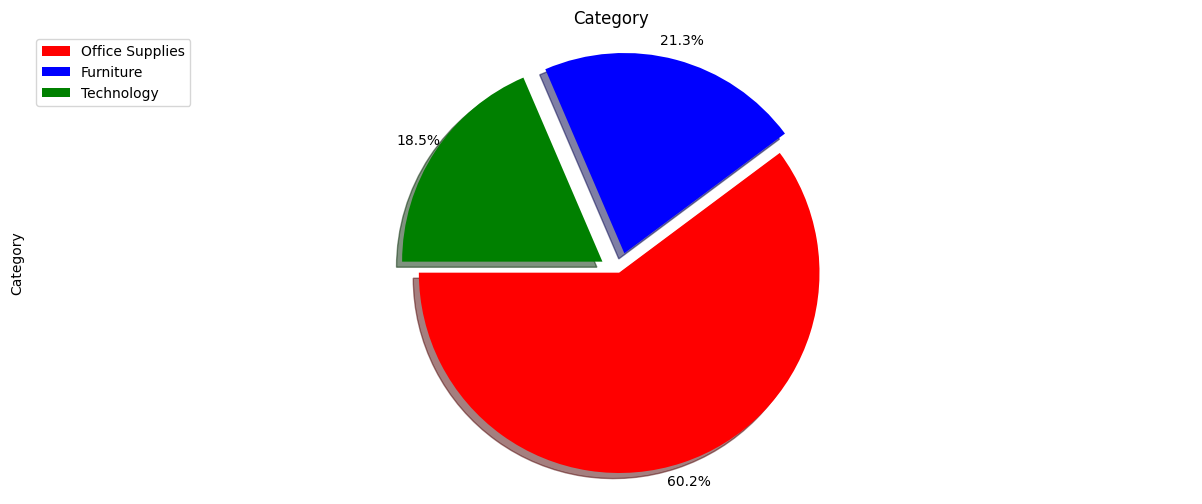

In [ ]:
explode_list=[0,0.1,0.1]
colors_list=["red", "blue", "green"]
category.plot(kind="pie", figsize=(15,6), autopct= "%1.1f%%", shadow=True, startangle=180, explode=explode_list, labels=None,  pctdistance=1.1, colors=colors_list)
plt.title("Category")
plt.axis("equal")
plt.legend(labels=category.index, loc="upper left")
plt.show()

observations:
Major distribution of business is in Office Supplies and least is in Technology

**Plotting the BAR GRAPH for Category wise Sales And Profit**

In [ ]:
#Category wise Sales
cs=df.groupby("Category").Sales.sum()
#Category wise Profit
cp=df.groupby("Category").Profit.sum()

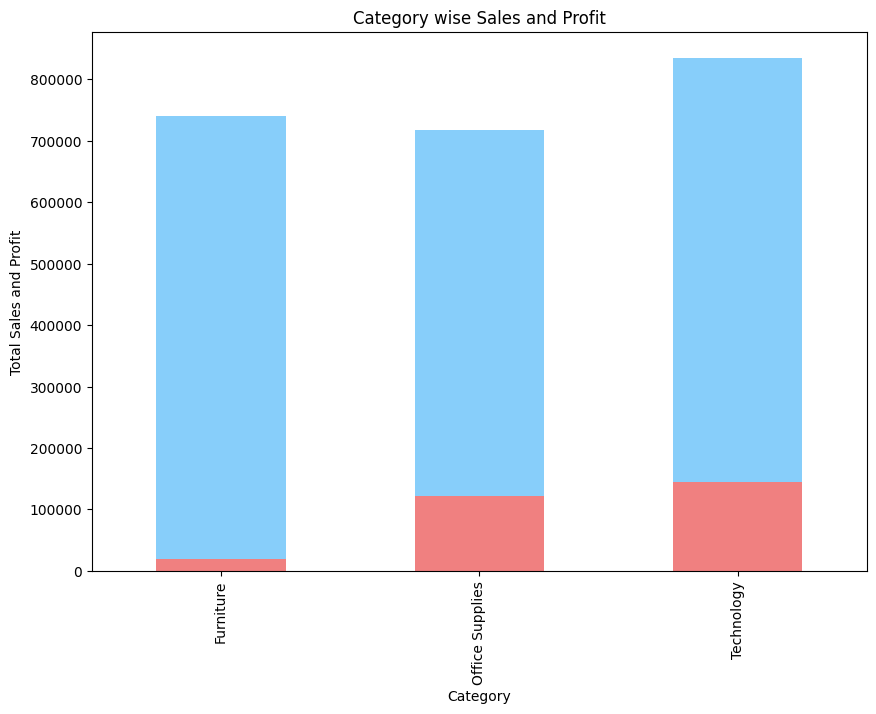

In [ ]:
#Sales
ax0=cs.plot(kind="bar", figsize=(10,7), color="lightskyblue")

#Profit
ax0=cp.plot(kind="bar", figsize=(10,7), color="lightcoral")

ax0.set_title("Category wise Sales and Profit")
ax0.set_ylabel("Total Sales and Profit")
plt.show()

observations:
1. Maximum Profit and Sales in "Category" is for "Technology" and "Office Supplies"

TO FIND OUT WHICH SUB-CATEGORY CONTRIBUTES MOST TO THE BUSINESS WE WILL BE,


**Plotting the PIE CHART for Sub-Category**

In [ ]:
sub=df["Sub-Category"].value_counts()
sub

Binders        1518
Paper          1344
Furnishings     954
Phones          888
Storage         845
Art             793
Accessories     773
Chairs          615
Appliances      466
Labels          359
Tables          319
Envelopes       254
Bookcases       226
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

<ipython-input-53-9f3143533894>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Spectral')


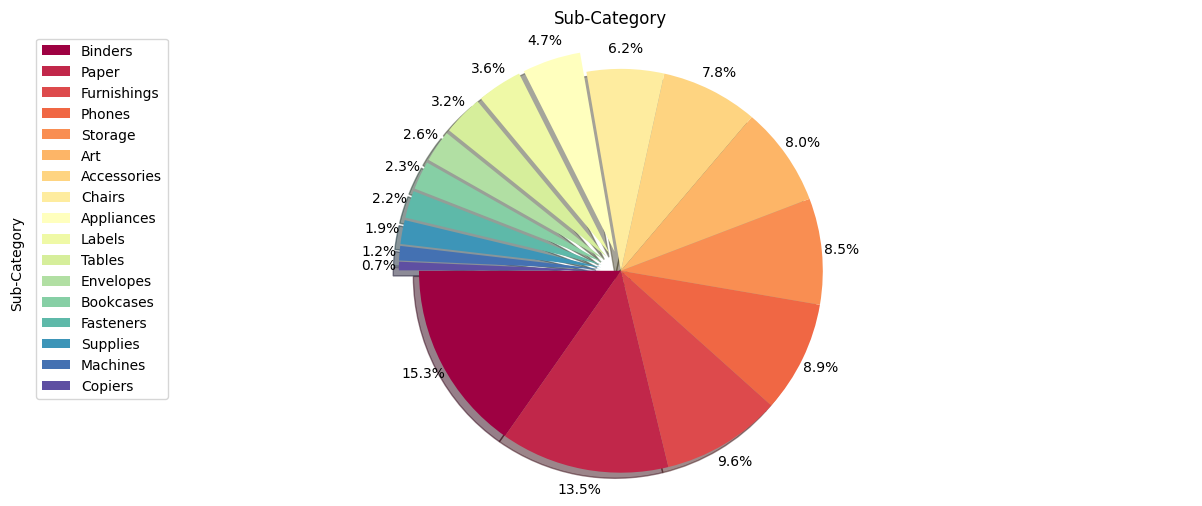

In [ ]:
from matplotlib import cm
cmap = cm.get_cmap('Spectral')
explode_list=[0,0,0,0,0,0,0,0,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]
sub.plot(kind="pie", figsize=(15,6), autopct="%1.1f%%", shadow=True, startangle=180, explode=explode_list, labels=None, pctdistance=1.1, cmap=cmap)
plt.title("Sub-Category")
plt.axis("equal")
plt.legend(labels=sub.index, loc="upper left")
plt.show()

observations:
Major distribution of business is in Binders, Paper and Furnishings
 and least distribution is in Copiers, Machines, Supplies

**Plotting the BAR GRAPH for both Category and Sub-Category for Total Sales And Profit**

In [ ]:
x=df.groupby(["Category", "Sub-Category"]).Sales.sum()
y=df.groupby(["Category", "Sub-Category"]).Profit.sum()

**FOR SALES**

Text(0, 0.5, 'Sales')

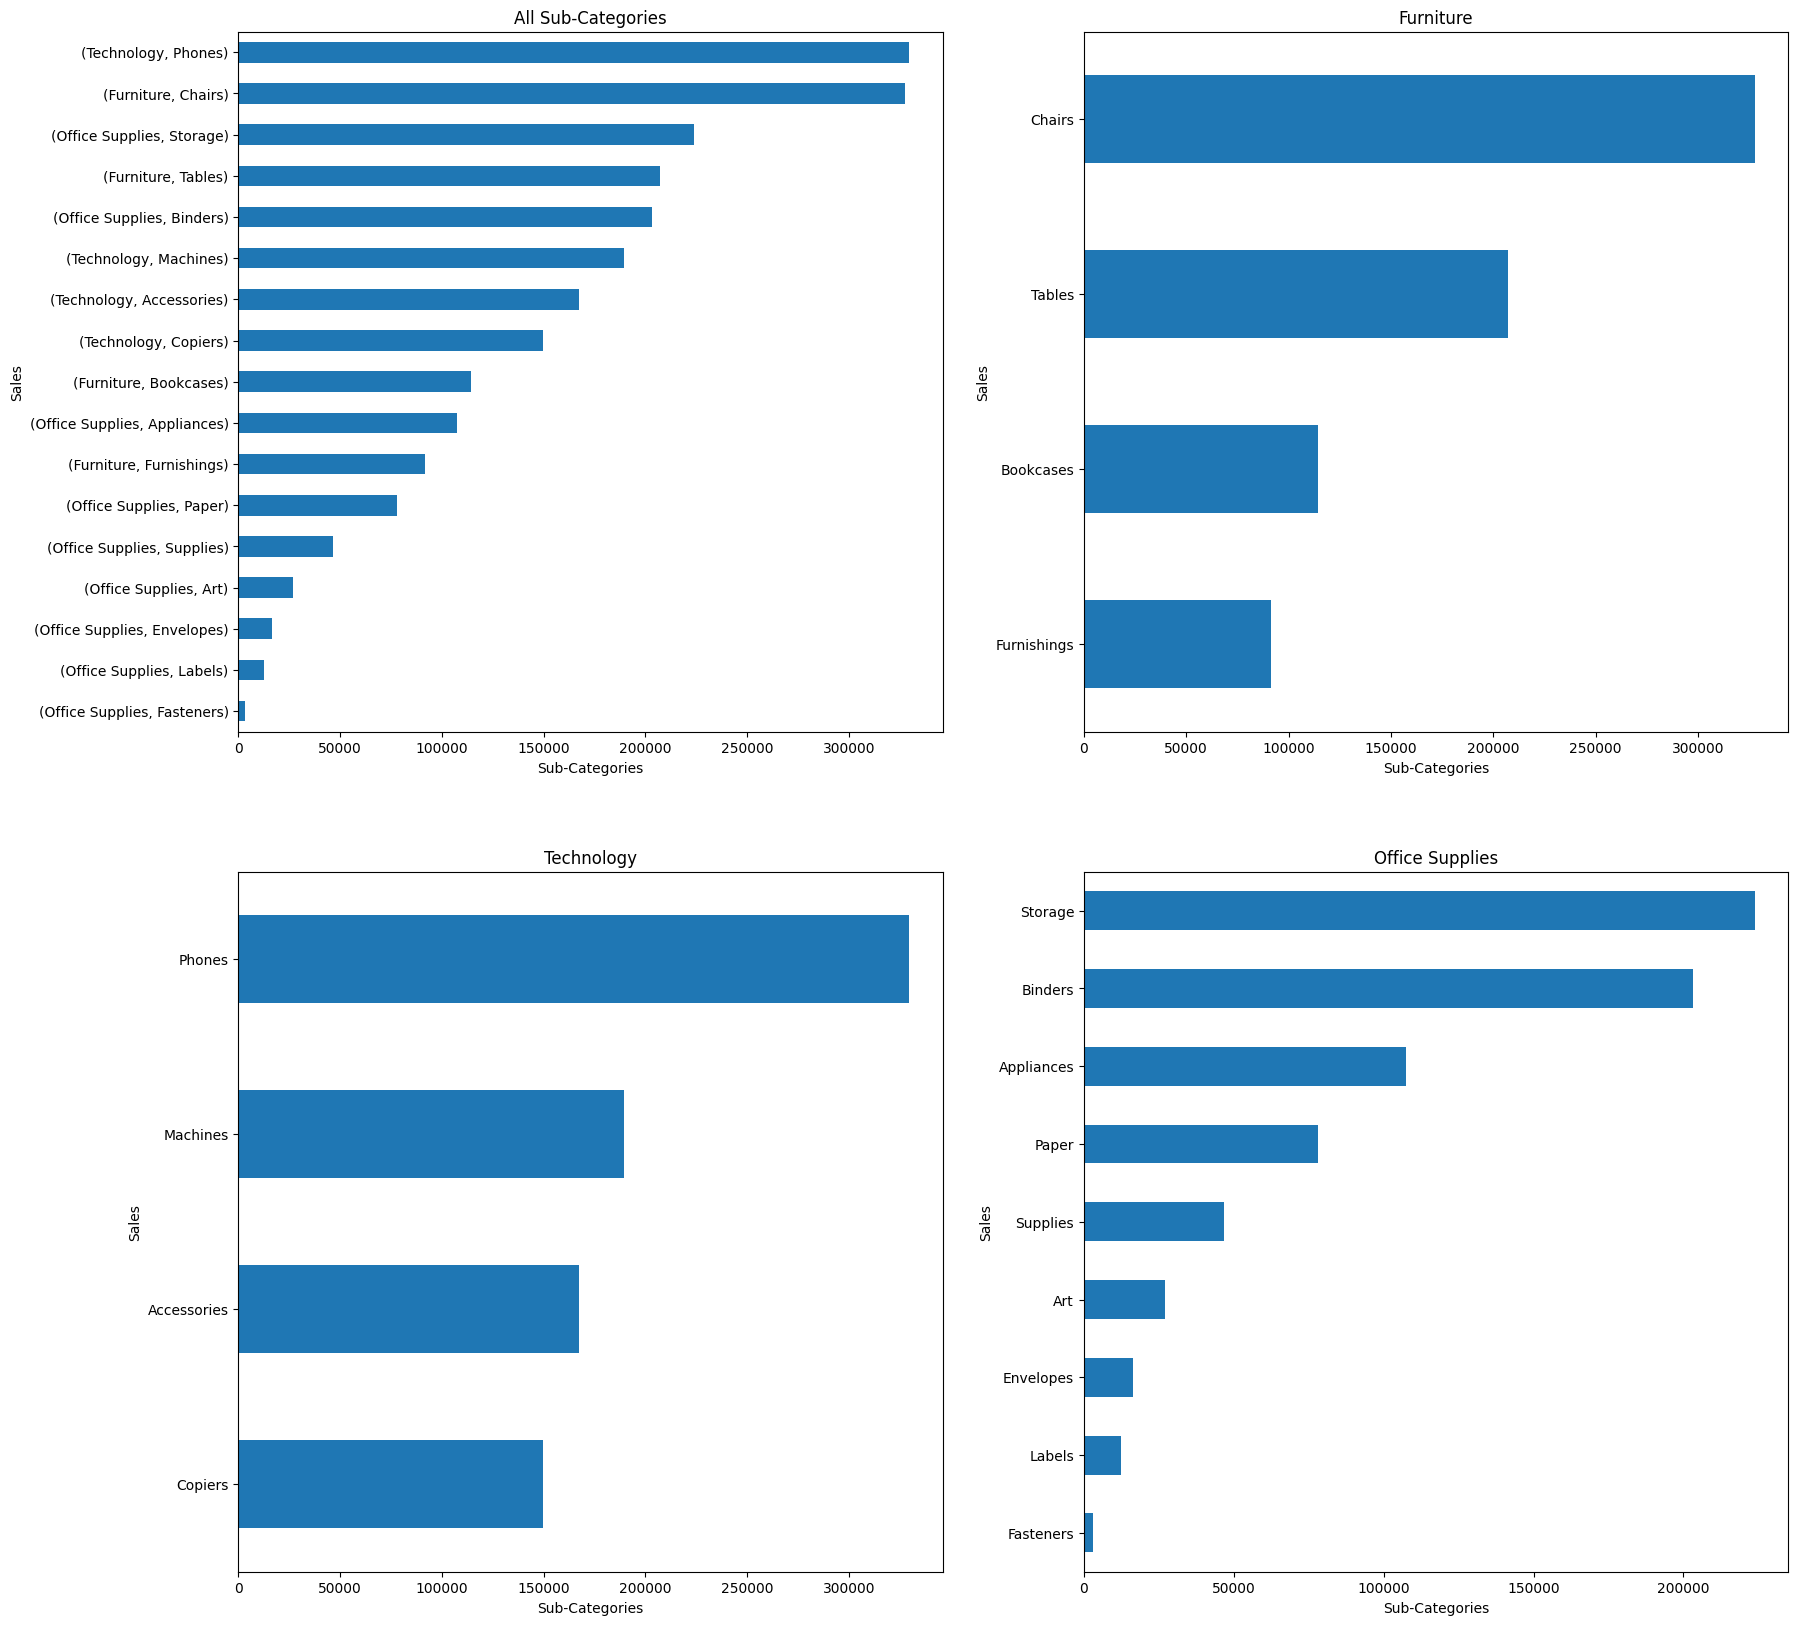

In [ ]:
fig=plt.figure()
ax0=fig.add_subplot(2,2,1)
ax1=fig.add_subplot(2,2,2)
ax2=fig.add_subplot(2,2,3)
ax3=fig.add_subplot(2,2,4)

#Furniture
x["Furniture"].sort_values(ascending=True).plot(kind="barh", figsize=(20,20), ax=ax1)
ax1.set_title("Furniture")
ax1.set_xlabel("Sub-Categories")
ax1.set_ylabel("Sales")

#Technology
x["Technology"].sort_values(ascending=True).plot(kind="barh", figsize=(20,20), ax=ax2)
ax2.set_title("Technology")
ax2.set_xlabel("Sub-Categories")
ax2.set_ylabel("Sales")

#Office Supplies
x["Office Supplies"].sort_values(ascending=True).plot(kind="barh", figsize=(20,20), ax=ax3)
ax3.set_title("Office Supplies")
ax3.set_xlabel("Sub-Categories")
ax3.set_ylabel("Sales")

#Total
x.sort_values(ascending=True).plot(kind="barh", figsize=(20,20), ax=ax0)
ax0.set_title("All Sub-Categories")
ax0.set_xlabel("Sub-Categories")
ax0.set_ylabel("Sales")

observations:
1. Maximum Sales are in: Phones(Technology), Chairs(Furniture), and Storage(Office Supplies)
2. Minimum Sales are in: Fasteners, Labels and Envelopes from Office Suppiles

**FOR PROFIT**

Text(0, 0.5, 'Profit')

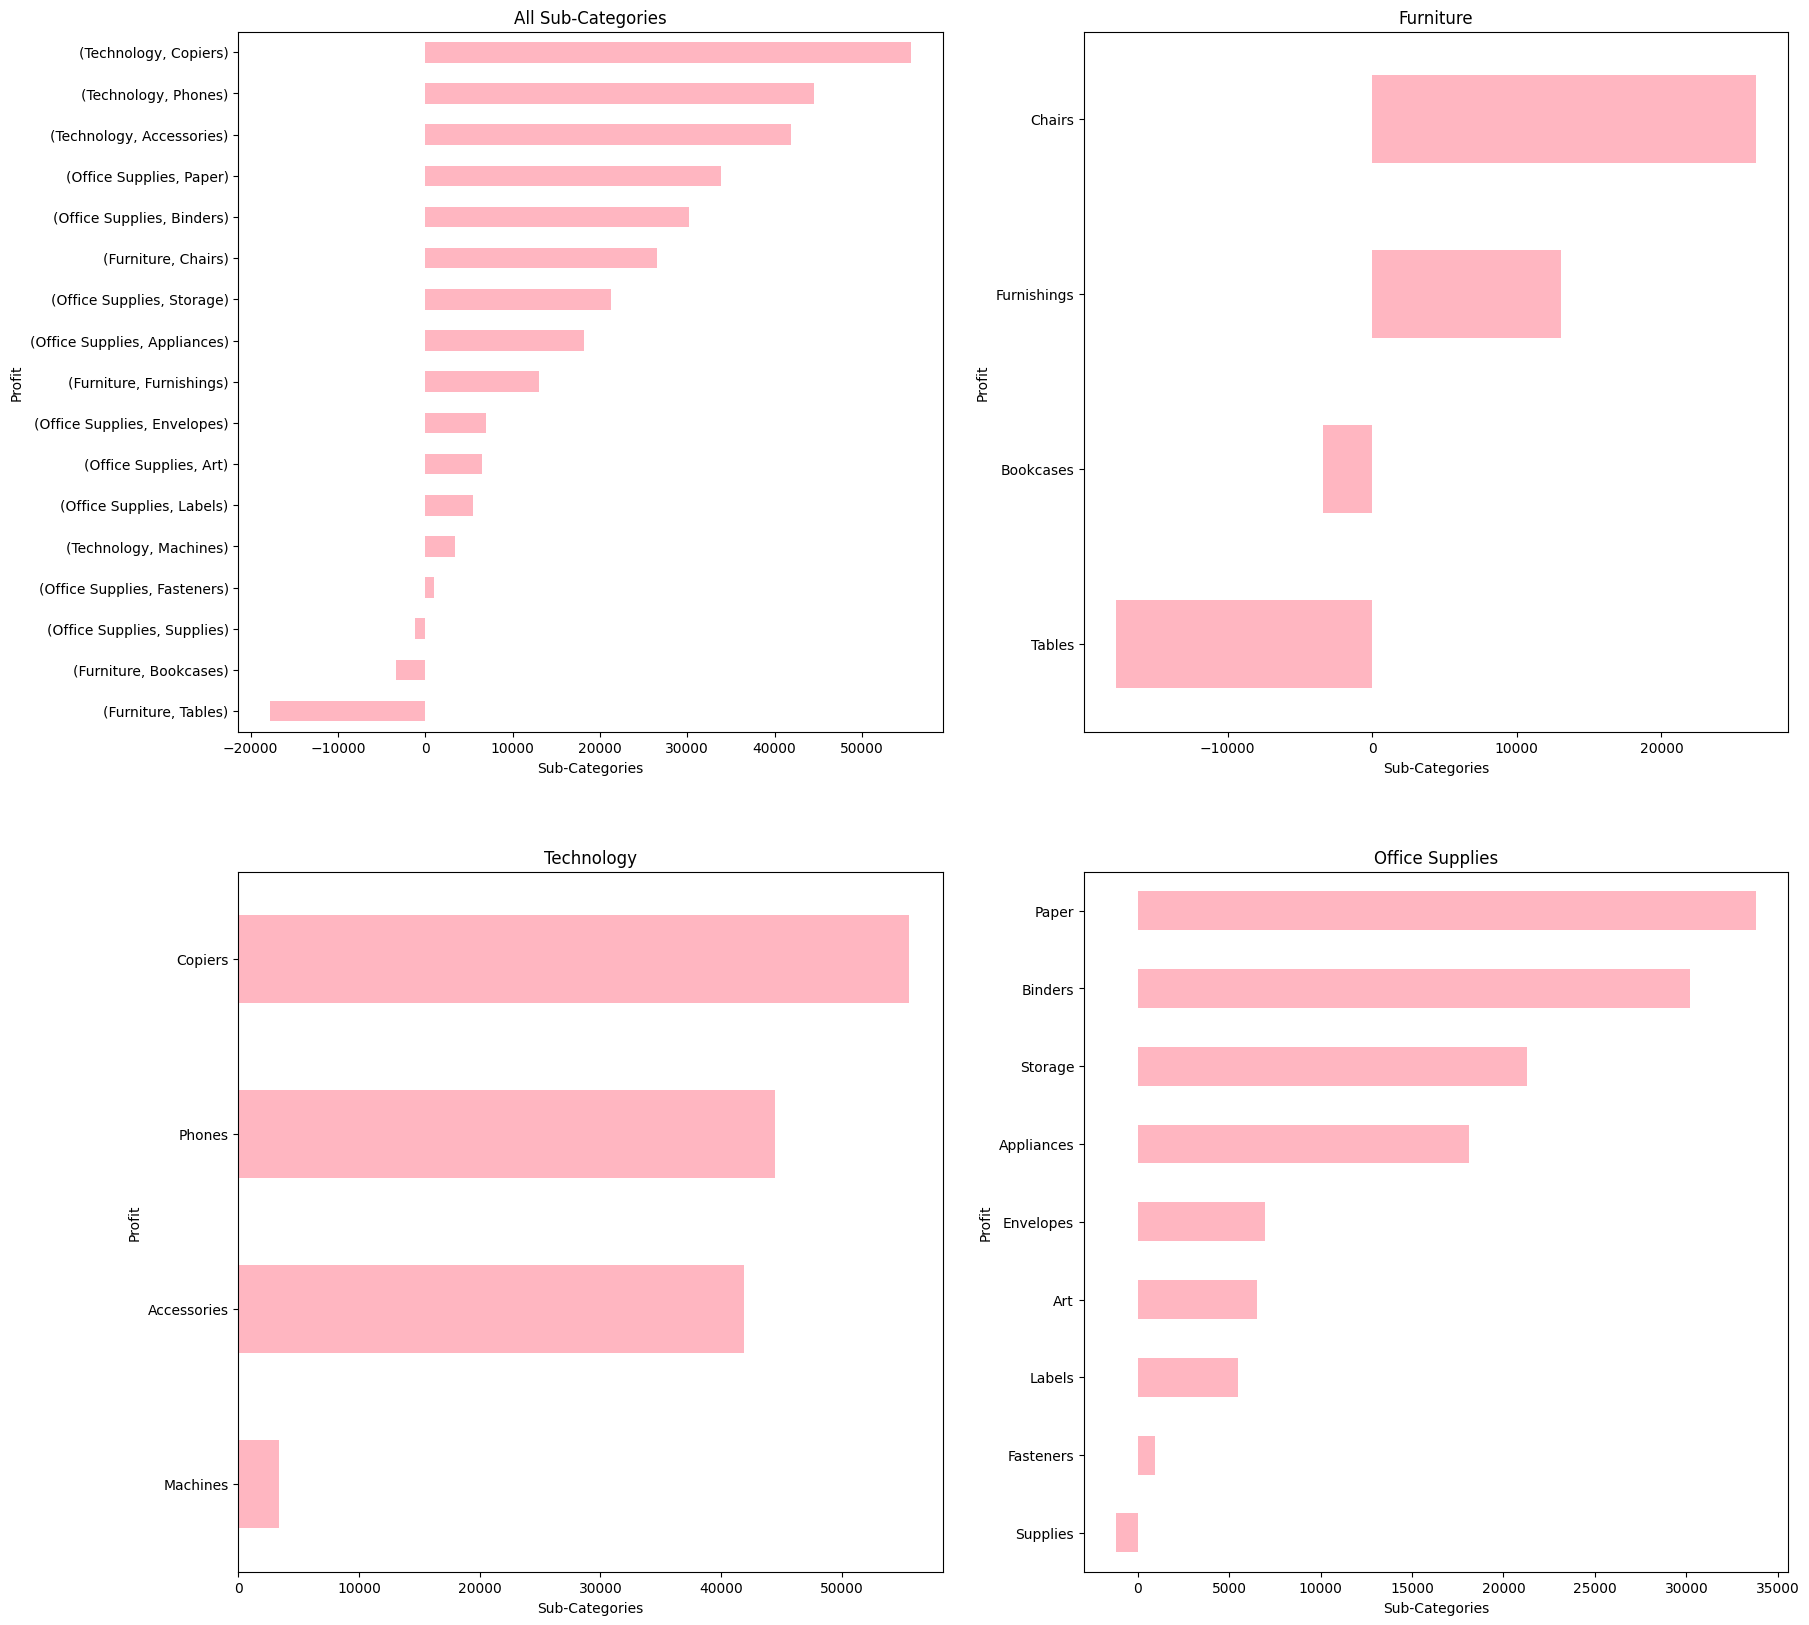

In [ ]:
fig=plt.figure()
ax0=fig.add_subplot(2,2,1)
ax1=fig.add_subplot(2,2,2)
ax2=fig.add_subplot(2,2,3)
ax3=fig.add_subplot(2,2,4)

#Furniture
y["Furniture"].sort_values(ascending=True).plot(kind="barh", figsize=(20,20), ax=ax1, color="lightpink")
ax1.set_title("Furniture")
ax1.set_xlabel("Sub-Categories")
ax1.set_ylabel("Profit")

#Technology
y["Technology"].sort_values(ascending=True).plot(kind="barh", figsize=(20,20), ax=ax2, color="lightpink")
ax2.set_title("Technology")
ax2.set_xlabel("Sub-Categories")
ax2.set_ylabel("Profit")

#Office Supplies
y["Office Supplies"].sort_values(ascending=True).plot(kind="barh", figsize=(20,20), ax=ax3, color="lightpink")
ax3.set_title("Office Supplies")
ax3.set_xlabel("Sub-Categories")
ax3.set_ylabel("Profit")

#Total
y.sort_values(ascending=True).plot(kind="barh", figsize=(20,20), ax=ax0, color="lightpink")
ax0.set_title("All Sub-Categories")
ax0.set_xlabel("Sub-Categories")
ax0.set_ylabel("Profit")

observations:
1. Maximum Profit is in: Copiers, Phones and Accesories from Technology
2. loss is in: Tables and Bookcases from Furniture and Supplies from Office Supplies

**Plotting Stacked Column Chart of Sales And Profit combined for Category and Sub-Category**

**FOR SALES AND PROFIT COMBINED**

Text(0, 0.5, 'Profit')

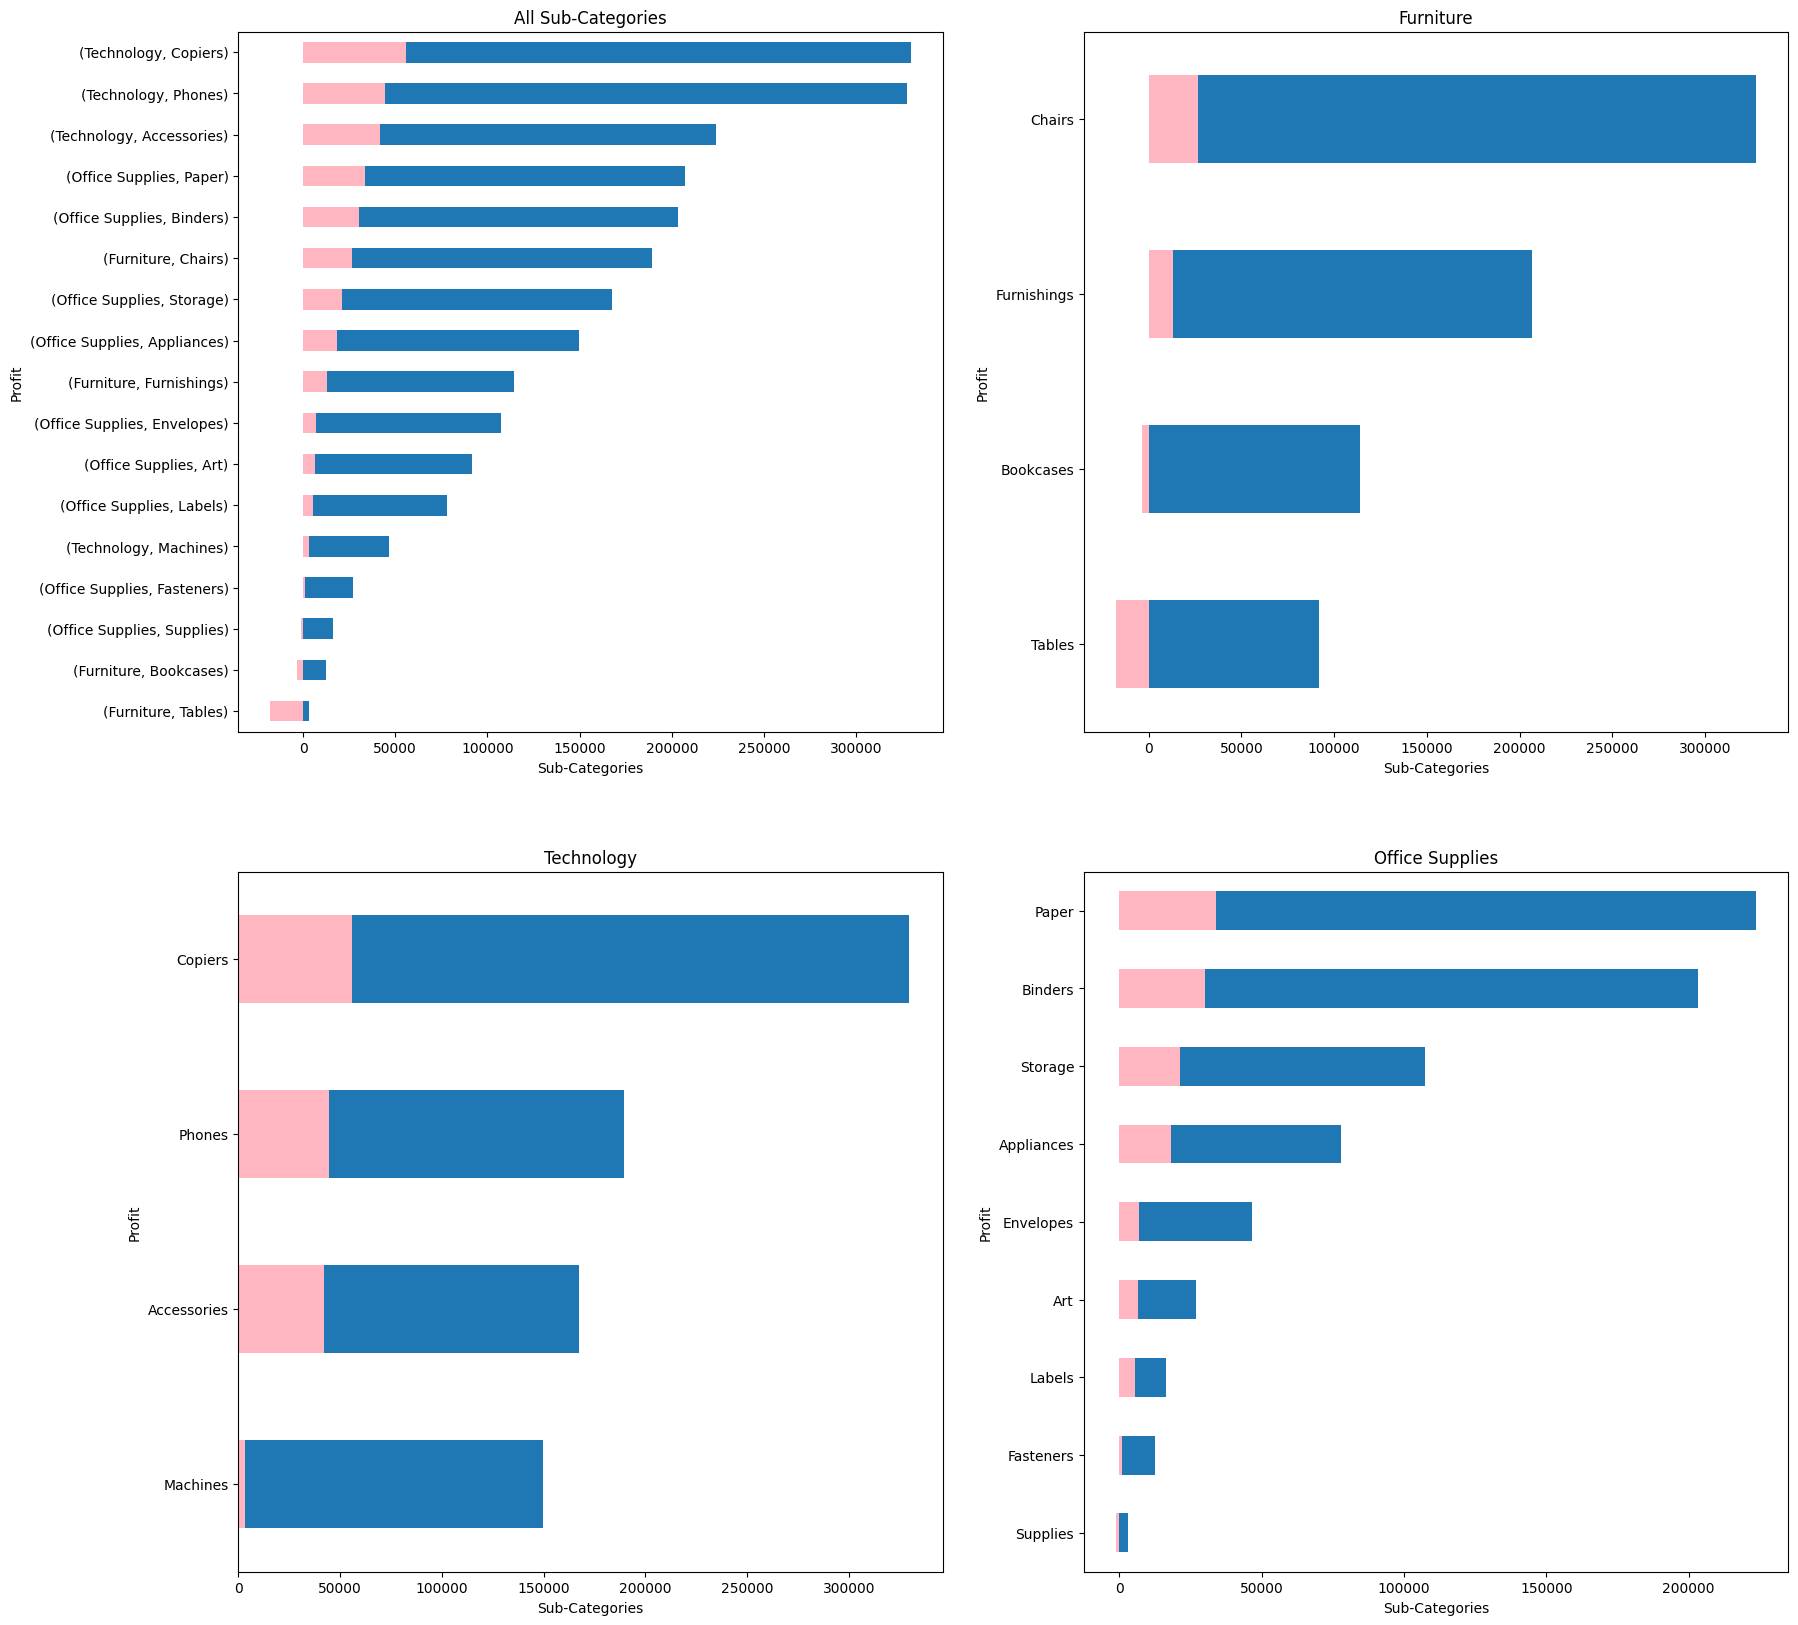

In [ ]:
#FOR SALES

fig=plt.figure()
ax0=fig.add_subplot(2,2,1)
ax1=fig.add_subplot(2,2,2)
ax2=fig.add_subplot(2,2,3)
ax3=fig.add_subplot(2,2,4)

#Furniture
x["Furniture"].sort_values(ascending=True).plot(kind="barh", figsize=(20,20), ax=ax1)
ax1.set_title("Furniture")
ax1.set_xlabel("Sub-Categories")
ax1.set_ylabel("Sales")

#Technology
x["Technology"].sort_values(ascending=True).plot(kind="barh", figsize=(20,20), ax=ax2)
ax2.set_title("Technology")
ax2.set_xlabel("Sub-Categories")
ax2.set_ylabel("Sales")

#Office Supplies
x["Office Supplies"].sort_values(ascending=True).plot(kind="barh", figsize=(20,20), ax=ax3)
ax3.set_title("Office Supplies")
ax3.set_xlabel("Sub-Categories")
ax3.set_ylabel("Sales")

#Total
x.sort_values(ascending=True).plot(kind="barh", figsize=(20,20), ax=ax0)
ax0.set_title("All Sub-Categories")
ax0.set_xlabel("Sub-Categories")
ax0.set_ylabel("Sales")

#FOR PROFIT

#Furniture
y["Furniture"].sort_values(ascending=True).plot(kind="barh", figsize=(20,20), ax=ax1, color="lightpink")
ax1.set_title("Furniture")
ax1.set_xlabel("Sub-Categories")
ax1.set_ylabel("Profit")

#Technology
y["Technology"].sort_values(ascending=True).plot(kind="barh", figsize=(20,20), ax=ax2, color="lightpink")
ax2.set_title("Technology")
ax2.set_xlabel("Sub-Categories")
ax2.set_ylabel("Profit")

#Office Supplies
y["Office Supplies"].sort_values(ascending=True).plot(kind="barh", figsize=(20,20), ax=ax3, color="lightpink")
ax3.set_title("Office Supplies")
ax3.set_xlabel("Sub-Categories")
ax3.set_ylabel("Profit")

#Total
y.sort_values(ascending=True).plot(kind="barh", figsize=(20,20), ax=ax0, color="lightpink")
ax0.set_title("All Sub-Categories")
ax0.set_xlabel("Sub-Categories")
ax0.set_ylabel("Profit")

observations:
1. Maximum Sales and Profit is in: Copiers, Phones, Accessories from Technology
2. Lowest Sales and Profit is in: Tables and Bookcases from Furniture and Supplies from Office Supplies

**For Calculating Highest Buyers State-Wise**

In [ ]:
state=df["State"].value_counts()
state

California              1980
New York                1119
Texas                    980
Pennsylvania             581
Washington               502
Illinois                 490
Ohio                     468
Florida                  383
Michigan                 254
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   123
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Carolina            42
Nevada        

Text(0, 0.5, 'Number of Buyers')

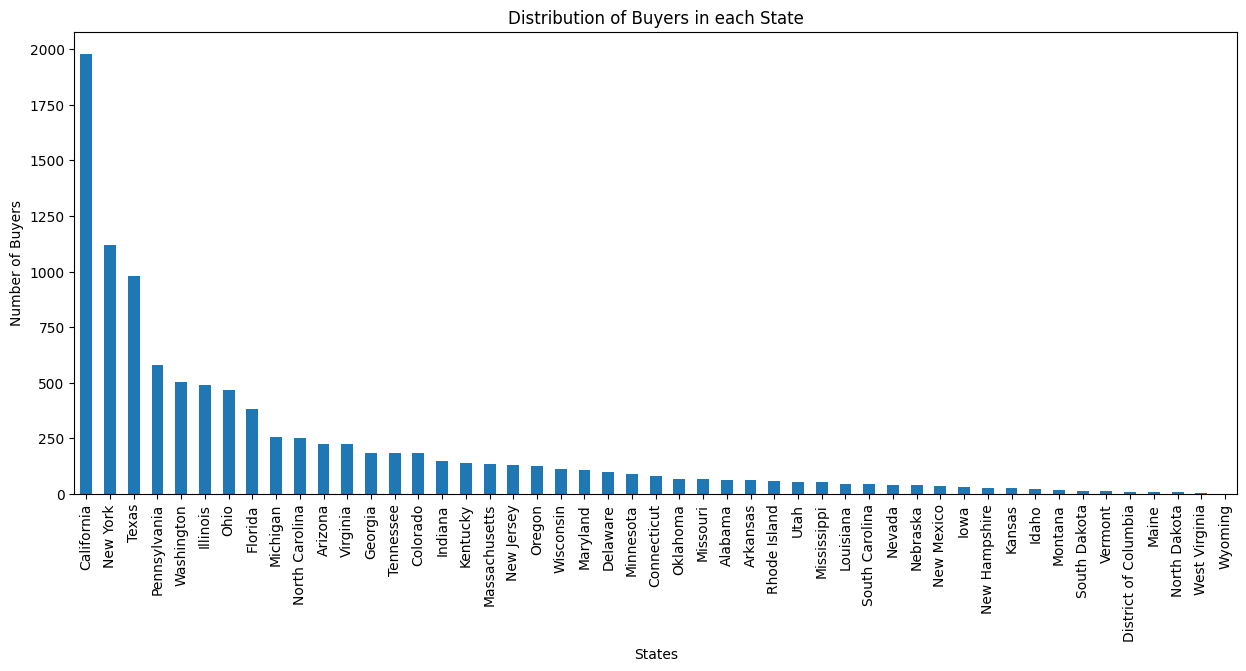

In [ ]:
state.plot(kind="bar", figsize=(15,6))
plt.title("Distribution of Buyers in each State")
plt.xlabel("States")
plt.ylabel("Number of Buyers")

observations:
1. Most no. of Buyers belong to "California", "New York" and "Texas"
2. Least no. of Buyers belong to "Wyoming", "West Virgina" and "North Dakota"

**State-Wise Distribution of Sales And Profit**

In [ ]:
ss=df.groupby(["State"]).Sales.sum()
sp=df.groupby(["State"]).Profit.sum()

Text(0, 0.5, 'Profit')

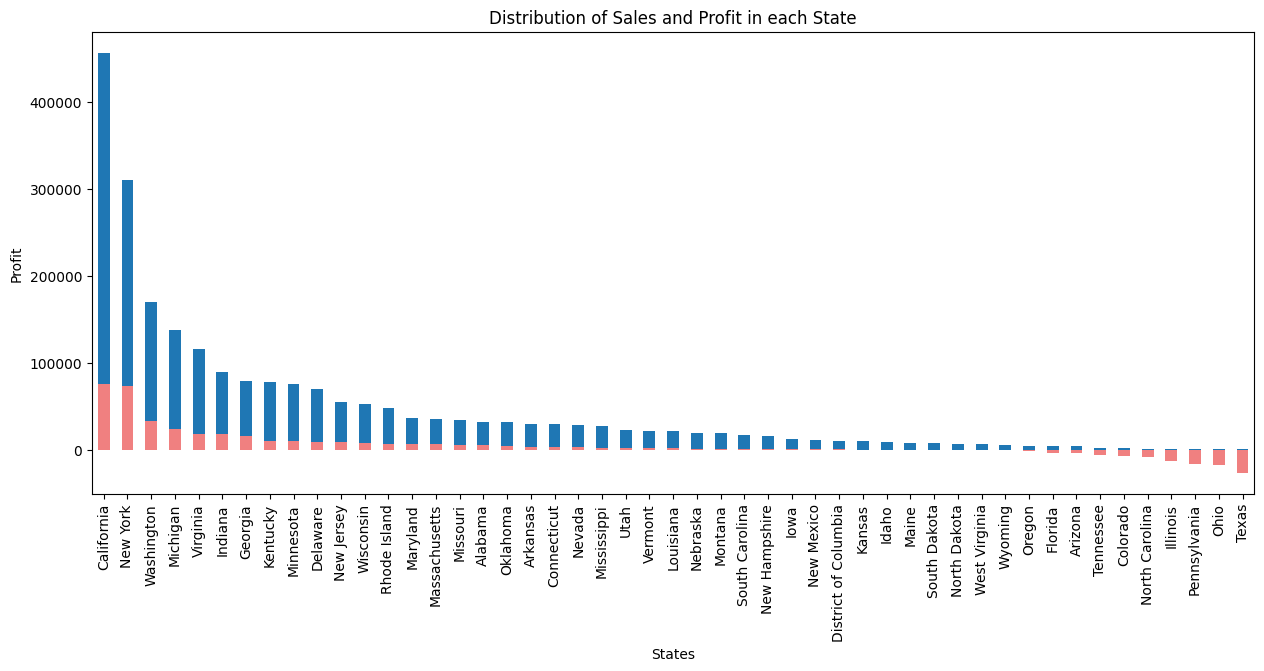

In [ ]:
#State wise  distribution of Sales
ss.sort_values(ascending=False).plot(kind="bar", figsize=(15,6))
plt.xlabel("States")
plt.ylabel("Sales")

#State wise distribution of Profit
sp.sort_values(ascending=False).plot(kind="bar", figsize=(15,6), color="lightcoral")
plt.title("Distribution of Sales and Profit in each State")
plt.xlabel("States")
plt.ylabel("Profit")

observations:
1. Maximum Sales and Profit is in cities: "California", "New York" and "Washington"
2. Minimum Sales and Profit is in cities: "Oregon", "Florida", "Tennessee", "Colorado, "North Carolina", "Illonis"

**Relation Between Profit and Discount**

In [ ]:
df["Discount"].corr(df["Profit"])

-0.21993898249765037

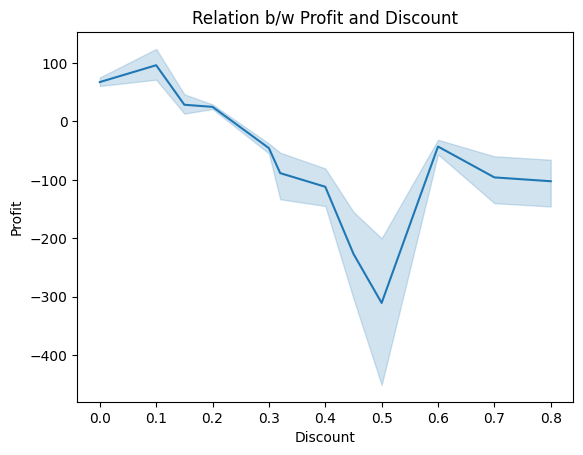

In [ ]:
sns.lineplot(x="Discount", y="Profit", data=df)
plt.title("Relation b/w Profit and Discount")
plt.show()

observations:

As we can see from above line plot that there is negative relation between Profit and Discount